In [1]:
import cv2

import matplotlib.pyplot as plt

import numpy as np

import torch

In [2]:
from feature_matchers import *

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.set_grad_enabled(False)

In [4]:
matchers = {
    'mutual_nn': mutual_nn_matcher,
    'ratio': ratio_matcher,
    'ratio_mutual_nn': ratio_mutual_nn_matcher,
    'similarity': similarity_matcher
}

## Read the images

In [5]:
image1 = cv2.imread('images/image1.png')
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

In [6]:
image2 = cv2.imread('images/image2.png')
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

## Extract SIFT features

In [7]:
def cv2_sift_to_root_sift(desc):
    desc = np.array(desc).astype(np.float)
    # L2 normalize.
    desc /= np.linalg.norm(desc, axis=1)[:, np.newaxis]
    # SIFT -> RootSIFT
    desc = desc / np.linalg.norm(desc, axis=1, ord=1)[:, np.newaxis]
    desc = np.sqrt(desc)
    return desc

In [8]:
sift = cv2.xfeatures2d.SIFT_create(nfeatures=1000)

In [9]:
kp1, desc1 = sift.detectAndCompute(gray_image1, None)
desc1 = cv2_sift_to_root_sift(desc1)

In [10]:
kp2, desc2 = sift.detectAndCompute(gray_image2, None)
desc2 = cv2_sift_to_root_sift(desc2)

## Plot the matches obtain with each matcher.

In [11]:
desc1 = torch.from_numpy(desc1).to(device)
desc2 = torch.from_numpy(desc2).to(device)

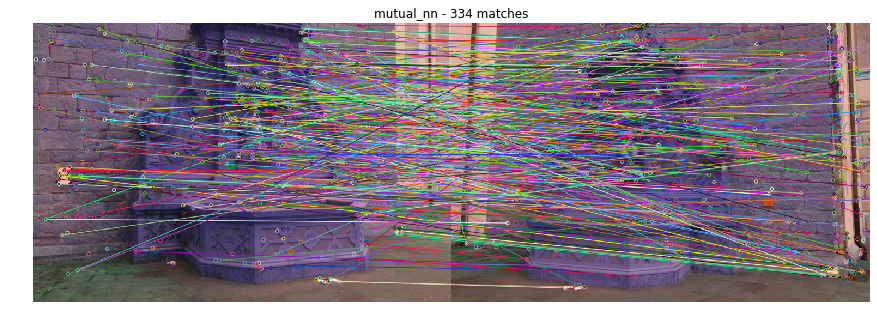

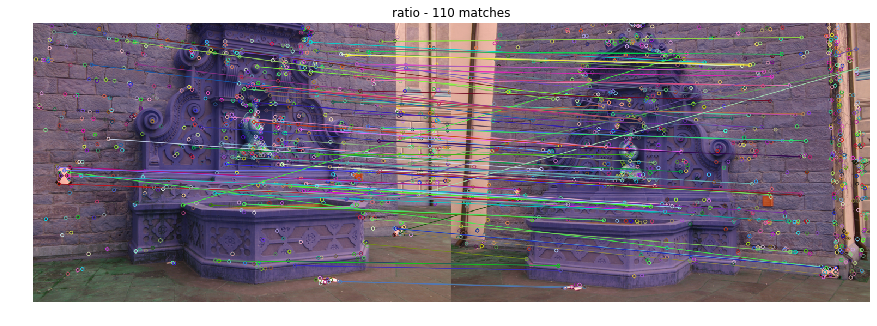

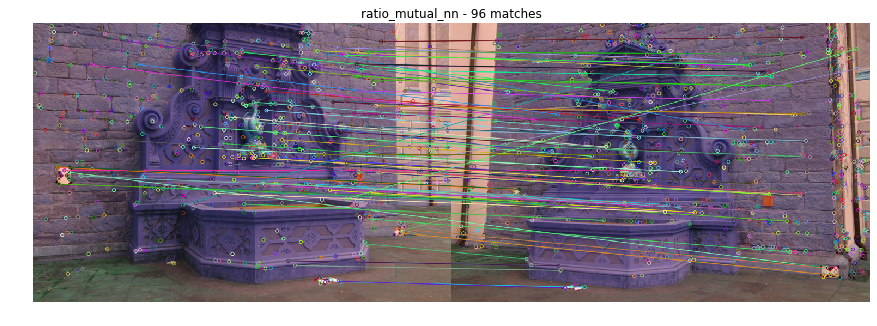

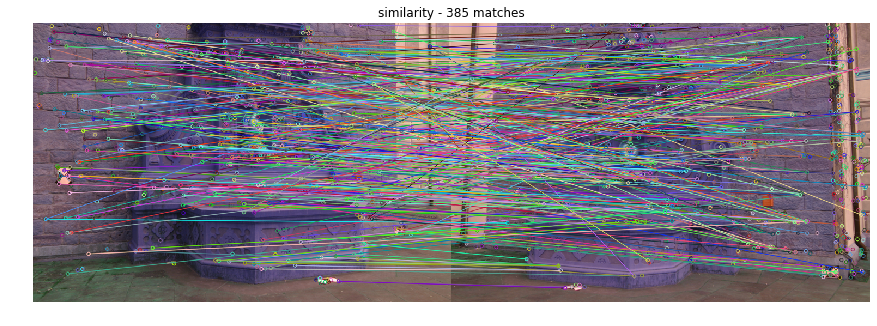

In [12]:
for matcher_name, matcher in matchers.items():
    matches, distances = matcher(desc1, desc2)
    
    placeholder_matches = [cv2.DMatch(idx1, idx2, 1) for idx1, idx2 in matches.data.cpu().numpy()]
    image3 = cv2.drawMatches(image1, kp1, image2, kp2, placeholder_matches, None)

    plt.figure(figsize=(15, 15))
    plt.imshow(image3)
    plt.title('%s - %d matches' % (matcher_name, matches.size(0)))
    plt.axis('off')
    plt.show()